In [266]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plts
import seaborn as sns

##### Task : This Task is aimed at showing the steps of removing outliars, Data set has a normal distribution with limited or no  outliars
##### I will be adding a couple of outliars to the table and steps show how the Outliars I manually added will be removed.
##### Aim: This poves we can remove outliars from data with normal perfect distribution with the  given steps 

In [267]:
df =  pd.read_csv('./Data/NameHeighWeightMetric.csv')
df.shape

(10000, 5)

In [268]:
df2 = df.copy()
df.shape,df2.shape


((10000, 5), (10000, 5))

In [269]:
df2.head(5)

,Id,Height,Weight,Name,Gender
0,1,187.57,109.72,Mary,Female
1,2,174.71,73.62,Anna,Female
2,3,188.24,96.50,Emma,Female
3,4,182.20,99.81,Elizabeth,Female
4,5,177.50,93.60,Minnie,Female


In [270]:
df2.Height.describe()

count    10000.000000
mean       168.573573
std          9.772756
min        137.830000
25%        161.300000
50%        168.450000
75%        175.702500
max        200.660000
Name: Height, dtype: float64

In [271]:
df2.Weight.describe()

count    10000.000000
mean        73.228059
std         14.564130
min         29.350000
25%         61.607500
50%         73.125000
75%         84.902500
max        122.470000
Name: Weight, dtype: float64

In [272]:
##### Starting with some data exploration  to find height and geright by Gender

dataMale = df2[df2['Gender'] == 'Male']
dataMale

In [273]:
dataMale = df2[df2['Gender'] == 'Male']
dataMale.head(5)

,Id,Height,Weight,Name,Gender
942,943,180.65,89.51,John,Male
943,944,159.52,67.41,William,Male
944,945,179.86,91.27,James,Male
945,946,176.66,90.35,Charles,Male
946,947,170.26,85.48,George,Male


In [274]:
dataFemale = df2[df2['Gender'] == 'Female']
dataFemale.head(5)

,Id,Height,Weight,Name,Gender
0,1,187.57,109.72,Mary,Female
1,2,174.71,73.62,Anna,Female
2,3,188.24,96.50,Emma,Female
3,4,182.20,99.81,Elizabeth,Female
4,5,177.50,93.60,Minnie,Female


In [275]:
dataMale.shape,dataFemale.shape

((4866, 5), (5134, 5))

In [276]:
#### Confirming we have an even distribution

<Axes: xlabel='Height', ylabel='Count'>

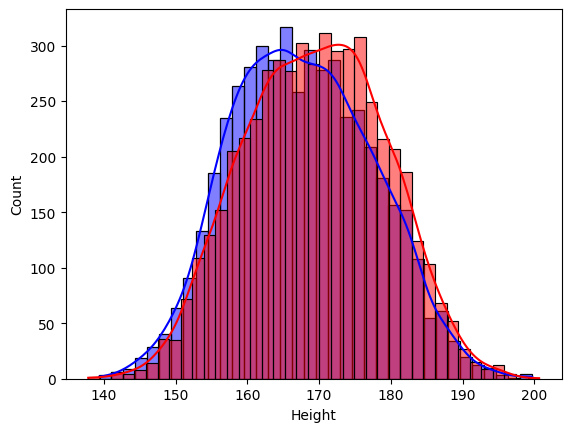

In [277]:
sns.histplot(dataMale.Height,kde= True,color='blue')
sns.histplot(dataFemale.Height,kde= True,color='red')

In [278]:
##### Using the Full Data Set so I can get outliars

In [279]:
##### Finding the Outliars with sns plot 

In [280]:
meanHeight,stdHeight = df2.Height.mean(),df2.Height.std()
meanHeight,stdHeight

(np.float64(168.573573), np.float64(9.772755626686104))

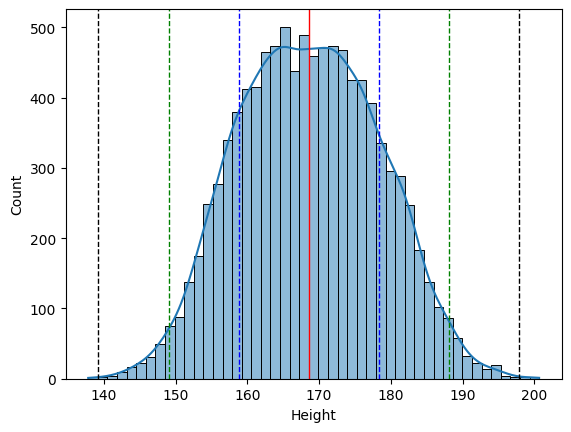

In [281]:
sns.histplot(df2.Height, kde= True)
plt.axvline(meanHeight, color='r',linestyle = 'solid',linewidth =1)


plt.axvline(meanHeight + stdHeight, color='b',linestyle = 'dashed', linewidth =1)
plt.axvline(meanHeight - stdHeight, color='b',linestyle = 'dashed', linewidth =1)


plt.axvline(meanHeight + 2* stdHeight, color='g',linestyle = 'dashed', linewidth =1)
plt.axvline(meanHeight - 2* stdHeight, color='g',linestyle = 'dashed', linewidth =1)



plt.axvline(meanHeight + 3* stdHeight, color='black',linestyle = 'dashed', linewidth =1)
plt.axvline(meanHeight - 3* stdHeight, color='black',linestyle = 'dashed', linewidth =1)

In [282]:
##### Confirming if its a normal distribution 

In [283]:
l1,r1 = round(meanHeight - stdHeight,2),round(meanHeight + stdHeight,2)
l2,r2 = round(meanHeight - 2*stdHeight,2),round(meanHeight + 2*stdHeight,2)
l3,r3 = round(meanHeight - 3*stdHeight,2),round(meanHeight + 3*stdHeight,2)

In [284]:
l1,r1,l2,r2,l3,r3

(np.float64(158.8),
 np.float64(178.35),
 np.float64(149.03),
 np.float64(188.12),
 np.float64(139.26),
 np.float64(197.89))

In [285]:
pge1 = (df2[(df2.Height>l1)&(df2.Height<r1)].shape[0]/df2.shape[0])*100
pge2 = (df2[(df2.Height>l2)&(df2.Height<r2)].shape[0]/df2.shape[0])*100
pge3= (df2[(df2.Height>l3)&(df2.Height<r3)].shape[0]/df2.shape[0])*100

In [286]:
pge1,pge2,pge3 

(65.25999999999999, 96.52, 99.92999999999999)

In [287]:
data_within_l3_r3 = df2[(df2['Height'] >= l3) & (df2['Height'] <= r3)]
data_within_l3_r3.shape

(9993, 5)

In [288]:
data_outside_l3_r3 = df2[(df2['Height'] < l3) | (df2['Height'] > r3)]
data_outside_l3_r3.shape

(7, 5)

In [289]:
l3,r3

(np.float64(139.26), np.float64(197.89))

In [290]:
clean_data,outliars_data = data_within_l3_r3.copy(),data_outside_l3_r3.copy()
clean_data.shape,outliars_data.shape

((9993, 5), (7, 5))

In [ ]:
# df2_cleaned = df2.drop(data_outside_l3_r3.index)
# df2_cleaned.shape

In [ ]:
# data_not_in_cleaned_data = df2.merge(cleaned_data, on=['Id', 'Height', 'Weight', 'Name', 'Gender'], how='left', indicator=True)
# data_not_in_cleaned_data = data_not_in_cleaned_data[data_not_in_cleaned_data['_merge'] == 'left_only']
# data_not_in_cleaned_data = data_not_in_cleaned_data.drop(columns=['_merge'])
# data_not_in_cleaned_data

In [ ]:
df2Zscore = df2.copy()

In [ ]:
df2Zscore['Z_ScoreHeights'] = (df2Zscore.Height - meanHeight)/stdHeight
df2Zscore.shape

(10000, 6)

In [294]:
meanHeight,stdHeight

(np.float64(168.573573), np.float64(9.772755626686104))

In [ ]:
outliarsZscore = df2Zscore[(df2Zscore.Z_ScoreHeights<-3)|(df2Zscore.Z_ScoreHeights>3)]
outliarsZscore.shape

(7, 6)

In [ ]:
newValidDataNew = df2Zscore[(df2Zscore.Z_ScoreHeights >= -3)&(df2Zscore.Z_ScoreHeights<=3)]
newValidDataNew.shape

(9993, 6)

In [293]:
newValidDataNew.Weight.describe()

count    9993.000000
mean       73.216318
std        14.528090
min        31.290000
25%        61.610000
50%        73.120000
75%        84.880000
max       116.060000
Name: Weight, dtype: float64

In [ ]:
outliarsZscore

,Id,Height,Weight,Name,Gender,Z_ScoreHeights
994,995,198.36,115.98,Eugene,Male,3.047905
1317,1318,199.29,103.12,Hans,Male,3.143067
2014,2015,200.66,122.47,Grace,Female,3.283253
3285,3286,199.46,115.16,Berry,Male,3.160462
3757,3758,199.70,111.46,Hector,Male,3.185020
6624,6625,138.73,32.38,Camilla,Female,-3.053752
9285,9286,137.83,29.35,Ralph,Female,-3.145845


In [ ]:
outliars_data

,Id,Height,Weight,Name,Gender
994,995,198.36,115.98,Eugene,Male
1317,1318,199.29,103.12,Hans,Male
2014,2015,200.66,122.47,Grace,Female
3285,3286,199.46,115.16,Berry,Male
3757,3758,199.70,111.46,Hector,Male
6624,6625,138.73,32.38,Camilla,Female
9285,9286,137.83,29.35,Ralph,Female


In [292]:
l3,r3

(np.float64(139.26), np.float64(197.89))

In [295]:
newValidDataNew.describe()

,Id,Height,Weight,Z_ScoreHeights
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,5001.272591,168.564165,73.216318,-0.000963
std,2886.797351,9.742235,14.528090,0.996877
min,1.000000,139.380000,31.290000,-2.987241
25%,2502.000000,161.300000,61.610000,-0.744270
50%,5002.000000,168.450000,73.120000,-0.012645
75%,7501.000000,175.690000,84.880000,0.728190
max,10000.000000,196.970000,116.060000,2.905672


<Axes: xlabel='Height', ylabel='Count'>

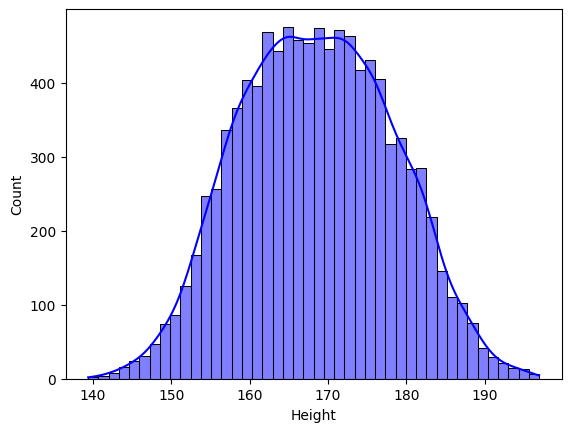

In [ ]:
sns.histplot(newValidDataNew.Height,kde= True,color='blue')